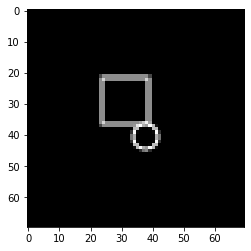

0


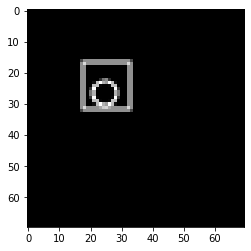

1


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.80it/s]


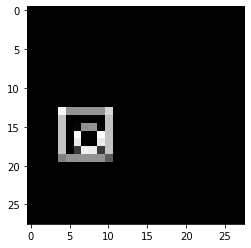

In [42]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense


batch_size = 16
num_classes = 1
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28



trainxs = []
trainximgs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\Toyimagesv3"

CATEGORIES = ["out_square", "in_square"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break


for category in CATEGORIES:  

    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=notinsquare 1=insquare

    for img in tqdm(os.listdir(path)):  # iterate over each image per point value
        ig_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array 
        ig_array = cv2.bitwise_not(ig_array)
        img_array = cv2.resize(ig_array, (28,28))
        new_img_array = rotate(img_array, 90)
        new_img_array1 = rotate(img_array, 180)
        new_img_array2 = rotate(img_array, 270)

        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainxs.append(new_img_array)
        trainxs.append(new_img_array1)
        trainxs.append(new_img_array2)
        trainxs.append(img_array)
        
    plt.imshow(img_array, cmap='gray')
            



In [38]:
from sklearn.model_selection import train_test_split

trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.float32)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=42)


print(x_train.shape)

(6400, 28, 28)


In [39]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(6400, 28, 28, 1)

In [33]:
print("yes")
print('x_train shape:', x_train.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

yes
x_train shape: (6400, 28, 28, 1)
x_train shape: (6400, 28, 28, 1)
6400 train samples
1600 test samples
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params

In [34]:
print("yes")
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = np.array(x_train)
x_test = np.array(x_test)
#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

yes
x_train shape: (6400, 28, 28, 1)
x_train shape: (6400, 28, 28, 1)
6400 train samples
1600 test samples
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params

In [40]:
print("yes")
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = np.array(x_train)
x_test = np.array(x_test)
#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

yes
x_train shape: (6400, 28, 28, 1)
x_train shape: (6400, 28, 28, 1)
6400 train samples
1600 test samples
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               307456    
____________

In [41]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 6400 samples, validate on 1600 samples
Epoch 1/10


5616/6400 [=========================>....] - ETA: 2:15 - loss: 0.6933 - accuracy: 0.56 - ETA: 55s - loss: 0.6926 - accuracy: 0.5000 - ETA: 39s - loss: 0.6907 - accuracy: 0.537 - ETA: 31s - loss: 0.6907 - accuracy: 0.526 - ETA: 29s - loss: 0.6891 - accuracy: 0.539 - ETA: 26s - loss: 0.6905 - accuracy: 0.531 - ETA: 24s - loss: 0.6884 - accuracy: 0.541 - ETA: 23s - loss: 0.6872 - accuracy: 0.548 - ETA: 22s - loss: 0.6863 - accuracy: 0.545 - ETA: 21s - loss: 0.6865 - accuracy: 0.547 - ETA: 20s - loss: 0.6901 - accuracy: 0.526 - ETA: 19s - loss: 0.6911 - accuracy: 0.511 - ETA: 18s - loss: 0.6915 - accuracy: 0.510 - ETA: 18s - loss: 0.6913 - accuracy: 0.520 - ETA: 17s - loss: 0.6913 - accuracy: 0.509 - ETA: 17s - loss: 0.6916 - accuracy: 0.504 - ETA: 17s - loss: 0.6917 - accuracy: 0.496 - ETA: 16s - loss: 0.6918 - accuracy: 0.492 - ETA: 16s - loss: 0.6920 - accuracy: 0.500 - ETA: 16s - loss: 0.6913 - accuracy: 0.500 - ETA: 16s - loss: 0.6916 - accuracy: 0.493 - ETA: 15s - loss: 0.6905 - accu

6400/6400 [==============================] - ETA: 1s - loss: 0.6306 - accuracy: 0.56 - ETA: 1s - loss: 0.6303 - accuracy: 0.56 - ETA: 1s - loss: 0.6301 - accuracy: 0.56 - ETA: 1s - loss: 0.6312 - accuracy: 0.56 - ETA: 1s - loss: 0.6309 - accuracy: 0.56 - ETA: 1s - loss: 0.6307 - accuracy: 0.56 - ETA: 1s - loss: 0.6301 - accuracy: 0.56 - ETA: 1s - loss: 0.6297 - accuracy: 0.56 - ETA: 1s - loss: 0.6297 - accuracy: 0.56 - ETA: 1s - loss: 0.6295 - accuracy: 0.56 - ETA: 1s - loss: 0.6292 - accuracy: 0.56 - ETA: 0s - loss: 0.6285 - accuracy: 0.56 - ETA: 0s - loss: 0.6283 - accuracy: 0.56 - ETA: 0s - loss: 0.6281 - accuracy: 0.56 - ETA: 0s - loss: 0.6280 - accuracy: 0.56 - ETA: 0s - loss: 0.6273 - accuracy: 0.56 - ETA: 0s - loss: 0.6272 - accuracy: 0.56 - ETA: 0s - loss: 0.6270 - accuracy: 0.56 - ETA: 0s - loss: 0.6278 - accuracy: 0.56 - ETA: 0s - loss: 0.6273 - accuracy: 0.56 - ETA: 0s - loss: 0.6268 - accuracy: 0.56 - ETA: 0s - loss: 0.6267 - accuracy: 0.56 - ETA: 0s - loss: 0.6264 - accura

5952/6400 [==========================>...] - ETA: 14s - loss: 0.5652 - accuracy: 0.500 - ETA: 13s - loss: 0.4883 - accuracy: 0.583 - ETA: 13s - loss: 0.5240 - accuracy: 0.612 - ETA: 13s - loss: 0.5400 - accuracy: 0.571 - ETA: 13s - loss: 0.5572 - accuracy: 0.555 - ETA: 14s - loss: 0.5593 - accuracy: 0.545 - ETA: 14s - loss: 0.5833 - accuracy: 0.519 - ETA: 14s - loss: 0.5904 - accuracy: 0.529 - ETA: 13s - loss: 0.5716 - accuracy: 0.558 - ETA: 13s - loss: 0.5703 - accuracy: 0.565 - ETA: 13s - loss: 0.5724 - accuracy: 0.568 - ETA: 13s - loss: 0.5678 - accuracy: 0.568 - ETA: 13s - loss: 0.5693 - accuracy: 0.570 - ETA: 13s - loss: 0.5707 - accuracy: 0.572 - ETA: 13s - loss: 0.5719 - accuracy: 0.564 - ETA: 13s - loss: 0.5719 - accuracy: 0.568 - ETA: 13s - loss: 0.5683 - accuracy: 0.572 - ETA: 13s - loss: 0.5669 - accuracy: 0.577 - ETA: 12s - loss: 0.5666 - accuracy: 0.581 - ETA: 12s - loss: 0.5697 - accuracy: 0.583 - ETA: 12s - loss: 0.5727 - accuracy: 0.576 - ETA: 12s - loss: 0.5686 - accur

6400/6400 [==============================] - ETA: 0s - loss: 0.5472 - accuracy: 0.61 - ETA: 0s - loss: 0.5461 - accuracy: 0.61 - ETA: 0s - loss: 0.5456 - accuracy: 0.61 - ETA: 0s - loss: 0.5454 - accuracy: 0.61 - ETA: 0s - loss: 0.5452 - accuracy: 0.61 - ETA: 0s - loss: 0.5451 - accuracy: 0.61 - ETA: 0s - loss: 0.5445 - accuracy: 0.61 - ETA: 0s - loss: 0.5446 - accuracy: 0.61 - ETA: 0s - loss: 0.5443 - accuracy: 0.61 - ETA: 0s - loss: 0.5444 - accuracy: 0.61 - ETA: 0s - loss: 0.5445 - accuracy: 0.61 - ETA: 0s - loss: 0.5444 - accuracy: 0.61 - ETA: 0s - loss: 0.5443 - accuracy: 0.61 - ETA: 0s - loss: 0.5450 - accuracy: 0.61 - 15s 2ms/step - loss: 0.5450 - accuracy: 0.6172 - val_loss: 0.5670 - val_accuracy: 0.6069
Epoch 3/10


5872/6400 [==========================>...] - ETA: 15s - loss: 0.6473 - accuracy: 0.687 - ETA: 12s - loss: 0.5595 - accuracy: 0.729 - ETA: 13s - loss: 0.5340 - accuracy: 0.662 - ETA: 13s - loss: 0.5407 - accuracy: 0.625 - ETA: 12s - loss: 0.5263 - accuracy: 0.645 - ETA: 12s - loss: 0.5265 - accuracy: 0.670 - ETA: 12s - loss: 0.5229 - accuracy: 0.663 - ETA: 12s - loss: 0.5282 - accuracy: 0.658 - ETA: 12s - loss: 0.5281 - accuracy: 0.661 - ETA: 13s - loss: 0.5260 - accuracy: 0.652 - ETA: 13s - loss: 0.5298 - accuracy: 0.657 - ETA: 13s - loss: 0.5259 - accuracy: 0.645 - ETA: 13s - loss: 0.5287 - accuracy: 0.641 - ETA: 13s - loss: 0.5389 - accuracy: 0.640 - ETA: 13s - loss: 0.5379 - accuracy: 0.641 - ETA: 13s - loss: 0.5373 - accuracy: 0.640 - ETA: 13s - loss: 0.5352 - accuracy: 0.633 - ETA: 13s - loss: 0.5317 - accuracy: 0.638 - ETA: 13s - loss: 0.5300 - accuracy: 0.632 - ETA: 13s - loss: 0.5329 - accuracy: 0.631 - ETA: 12s - loss: 0.5312 - accuracy: 0.634 - ETA: 12s - loss: 0.5290 - accur

6400/6400 [==============================] - ETA: 1s - loss: 0.5273 - accuracy: 0.62 - ETA: 1s - loss: 0.5273 - accuracy: 0.62 - ETA: 0s - loss: 0.5274 - accuracy: 0.62 - ETA: 0s - loss: 0.5273 - accuracy: 0.62 - ETA: 0s - loss: 0.5274 - accuracy: 0.62 - ETA: 0s - loss: 0.5275 - accuracy: 0.62 - ETA: 0s - loss: 0.5276 - accuracy: 0.62 - ETA: 0s - loss: 0.5283 - accuracy: 0.62 - ETA: 0s - loss: 0.5286 - accuracy: 0.61 - ETA: 0s - loss: 0.5290 - accuracy: 0.61 - ETA: 0s - loss: 0.5291 - accuracy: 0.61 - ETA: 0s - loss: 0.5294 - accuracy: 0.61 - ETA: 0s - loss: 0.5299 - accuracy: 0.61 - ETA: 0s - loss: 0.5306 - accuracy: 0.61 - ETA: 0s - loss: 0.5321 - accuracy: 0.61 - ETA: 0s - loss: 0.5322 - accuracy: 0.61 - 15s 2ms/step - loss: 0.5320 - accuracy: 0.6167 - val_loss: 0.5372 - val_accuracy: 0.6162
Epoch 4/10


6000/6400 [===========================>..] - ETA: 15s - loss: 0.5631 - accuracy: 0.687 - ETA: 13s - loss: 0.5346 - accuracy: 0.625 - ETA: 13s - loss: 0.5476 - accuracy: 0.600 - ETA: 13s - loss: 0.5522 - accuracy: 0.616 - ETA: 13s - loss: 0.5499 - accuracy: 0.625 - ETA: 13s - loss: 0.5367 - accuracy: 0.642 - ETA: 13s - loss: 0.5342 - accuracy: 0.634 - ETA: 12s - loss: 0.5381 - accuracy: 0.629 - ETA: 13s - loss: 0.5337 - accuracy: 0.628 - ETA: 12s - loss: 0.5256 - accuracy: 0.631 - ETA: 13s - loss: 0.5299 - accuracy: 0.625 - ETA: 13s - loss: 0.5212 - accuracy: 0.630 - ETA: 12s - loss: 0.5123 - accuracy: 0.643 - ETA: 13s - loss: 0.5109 - accuracy: 0.642 - ETA: 13s - loss: 0.5146 - accuracy: 0.639 - ETA: 13s - loss: 0.5120 - accuracy: 0.640 - ETA: 13s - loss: 0.5133 - accuracy: 0.635 - ETA: 13s - loss: 0.5101 - accuracy: 0.638 - ETA: 13s - loss: 0.5149 - accuracy: 0.639 - ETA: 13s - loss: 0.5188 - accuracy: 0.637 - ETA: 13s - loss: 0.5200 - accuracy: 0.639 - ETA: 12s - loss: 0.5179 - accur

6400/6400 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.62 - ETA: 0s - loss: 0.5199 - accuracy: 0.62 - ETA: 0s - loss: 0.5202 - accuracy: 0.62 - ETA: 0s - loss: 0.5204 - accuracy: 0.62 - ETA: 0s - loss: 0.5209 - accuracy: 0.62 - ETA: 0s - loss: 0.5205 - accuracy: 0.62 - ETA: 0s - loss: 0.5206 - accuracy: 0.62 - ETA: 0s - loss: 0.5209 - accuracy: 0.62 - ETA: 0s - loss: 0.5212 - accuracy: 0.62 - ETA: 0s - loss: 0.5214 - accuracy: 0.62 - ETA: 0s - loss: 0.5214 - accuracy: 0.62 - ETA: 0s - loss: 0.5215 - accuracy: 0.62 - 15s 2ms/step - loss: 0.5215 - accuracy: 0.6261 - val_loss: 0.5348 - val_accuracy: 0.6131
Epoch 5/10


6032/6400 [===========================>..] - ETA: 14s - loss: 0.5218 - accuracy: 0.437 - ETA: 13s - loss: 0.5357 - accuracy: 0.479 - ETA: 13s - loss: 0.5218 - accuracy: 0.537 - ETA: 13s - loss: 0.5220 - accuracy: 0.562 - ETA: 14s - loss: 0.5311 - accuracy: 0.583 - ETA: 13s - loss: 0.5371 - accuracy: 0.573 - ETA: 13s - loss: 0.5381 - accuracy: 0.557 - ETA: 13s - loss: 0.5300 - accuracy: 0.579 - ETA: 13s - loss: 0.5289 - accuracy: 0.591 - ETA: 13s - loss: 0.5096 - accuracy: 0.621 - ETA: 13s - loss: 0.5044 - accuracy: 0.631 - ETA: 13s - loss: 0.5003 - accuracy: 0.641 - ETA: 13s - loss: 0.5052 - accuracy: 0.645 - ETA: 13s - loss: 0.5033 - accuracy: 0.634 - ETA: 13s - loss: 0.4985 - accuracy: 0.629 - ETA: 13s - loss: 0.4986 - accuracy: 0.625 - ETA: 12s - loss: 0.4985 - accuracy: 0.628 - ETA: 12s - loss: 0.4910 - accuracy: 0.642 - ETA: 12s - loss: 0.4939 - accuracy: 0.638 - ETA: 12s - loss: 0.4998 - accuracy: 0.633 - ETA: 12s - loss: 0.5029 - accuracy: 0.632 - ETA: 12s - loss: 0.5037 - accur

6400/6400 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.62 - ETA: 0s - loss: 0.5212 - accuracy: 0.62 - ETA: 0s - loss: 0.5217 - accuracy: 0.62 - ETA: 0s - loss: 0.5214 - accuracy: 0.62 - ETA: 0s - loss: 0.5213 - accuracy: 0.62 - ETA: 0s - loss: 0.5208 - accuracy: 0.62 - ETA: 0s - loss: 0.5209 - accuracy: 0.62 - ETA: 0s - loss: 0.5209 - accuracy: 0.62 - ETA: 0s - loss: 0.5210 - accuracy: 0.62 - ETA: 0s - loss: 0.5210 - accuracy: 0.62 - ETA: 0s - loss: 0.5211 - accuracy: 0.62 - 15s 2ms/step - loss: 0.5208 - accuracy: 0.6244 - val_loss: 0.5340 - val_accuracy: 0.6125
Epoch 6/10


5984/6400 [===========================>..] - ETA: 15s - loss: 0.6061 - accuracy: 0.625 - ETA: 13s - loss: 0.5486 - accuracy: 0.625 - ETA: 13s - loss: 0.5283 - accuracy: 0.650 - ETA: 13s - loss: 0.4832 - accuracy: 0.687 - ETA: 13s - loss: 0.4915 - accuracy: 0.659 - ETA: 13s - loss: 0.4969 - accuracy: 0.681 - ETA: 13s - loss: 0.5133 - accuracy: 0.677 - ETA: 12s - loss: 0.5258 - accuracy: 0.658 - ETA: 12s - loss: 0.5225 - accuracy: 0.665 - ETA: 12s - loss: 0.5240 - accuracy: 0.667 - ETA: 12s - loss: 0.5183 - accuracy: 0.666 - ETA: 12s - loss: 0.5091 - accuracy: 0.673 - ETA: 12s - loss: 0.5031 - accuracy: 0.670 - ETA: 12s - loss: 0.5137 - accuracy: 0.675 - ETA: 12s - loss: 0.5143 - accuracy: 0.665 - ETA: 12s - loss: 0.5174 - accuracy: 0.661 - ETA: 12s - loss: 0.5188 - accuracy: 0.664 - ETA: 12s - loss: 0.5149 - accuracy: 0.671 - ETA: 12s - loss: 0.5114 - accuracy: 0.678 - ETA: 12s - loss: 0.5064 - accuracy: 0.671 - ETA: 12s - loss: 0.5038 - accuracy: 0.668 - ETA: 12s - loss: 0.5005 - accur

6400/6400 [==============================] - ETA: 0s - loss: 0.5198 - accuracy: 0.62 - ETA: 0s - loss: 0.5199 - accuracy: 0.62 - ETA: 0s - loss: 0.5199 - accuracy: 0.62 - ETA: 0s - loss: 0.5201 - accuracy: 0.62 - ETA: 0s - loss: 0.5202 - accuracy: 0.62 - ETA: 0s - loss: 0.5203 - accuracy: 0.62 - ETA: 0s - loss: 0.5202 - accuracy: 0.62 - ETA: 0s - loss: 0.5202 - accuracy: 0.62 - ETA: 0s - loss: 0.5205 - accuracy: 0.62 - ETA: 0s - loss: 0.5203 - accuracy: 0.62 - ETA: 0s - loss: 0.5200 - accuracy: 0.62 - ETA: 0s - loss: 0.5202 - accuracy: 0.62 - 15s 2ms/step - loss: 0.5201 - accuracy: 0.6245 - val_loss: 0.5349 - val_accuracy: 0.6119
Epoch 7/10


6064/6400 [===========================>..] - ETA: 13s - loss: 0.5198 - accuracy: 0.687 - ETA: 13s - loss: 0.5199 - accuracy: 0.687 - ETA: 13s - loss: 0.5026 - accuracy: 0.650 - ETA: 13s - loss: 0.5014 - accuracy: 0.669 - ETA: 12s - loss: 0.5247 - accuracy: 0.659 - ETA: 13s - loss: 0.5160 - accuracy: 0.659 - ETA: 13s - loss: 0.5052 - accuracy: 0.653 - ETA: 13s - loss: 0.5157 - accuracy: 0.658 - ETA: 13s - loss: 0.5159 - accuracy: 0.660 - ETA: 13s - loss: 0.5188 - accuracy: 0.649 - ETA: 13s - loss: 0.5169 - accuracy: 0.640 - ETA: 13s - loss: 0.5211 - accuracy: 0.627 - ETA: 13s - loss: 0.5300 - accuracy: 0.625 - ETA: 13s - loss: 0.5293 - accuracy: 0.622 - ETA: 13s - loss: 0.5363 - accuracy: 0.629 - ETA: 13s - loss: 0.5366 - accuracy: 0.629 - ETA: 13s - loss: 0.5315 - accuracy: 0.630 - ETA: 12s - loss: 0.5321 - accuracy: 0.630 - ETA: 12s - loss: 0.5314 - accuracy: 0.630 - ETA: 12s - loss: 0.5342 - accuracy: 0.638 - ETA: 12s - loss: 0.5350 - accuracy: 0.633 - ETA: 12s - loss: 0.5342 - accur

6400/6400 [==============================] - ETA: 0s - loss: 0.5186 - accuracy: 0.62 - ETA: 0s - loss: 0.5184 - accuracy: 0.62 - ETA: 0s - loss: 0.5184 - accuracy: 0.62 - ETA: 0s - loss: 0.5179 - accuracy: 0.62 - ETA: 0s - loss: 0.5181 - accuracy: 0.62 - ETA: 0s - loss: 0.5177 - accuracy: 0.62 - ETA: 0s - loss: 0.5179 - accuracy: 0.62 - ETA: 0s - loss: 0.5179 - accuracy: 0.62 - ETA: 0s - loss: 0.5177 - accuracy: 0.62 - ETA: 0s - loss: 0.5176 - accuracy: 0.62 - 15s 2ms/step - loss: 0.5178 - accuracy: 0.6253 - val_loss: 0.5325 - val_accuracy: 0.6131
Epoch 8/10


5616/6400 [=========================>....] - ETA: 13s - loss: 0.5197 - accuracy: 0.750 - ETA: 14s - loss: 0.5055 - accuracy: 0.645 - ETA: 16s - loss: 0.5199 - accuracy: 0.625 - ETA: 16s - loss: 0.5199 - accuracy: 0.650 - ETA: 18s - loss: 0.5271 - accuracy: 0.635 - ETA: 17s - loss: 0.5091 - accuracy: 0.640 - ETA: 18s - loss: 0.5151 - accuracy: 0.618 - ETA: 17s - loss: 0.5081 - accuracy: 0.625 - ETA: 16s - loss: 0.5099 - accuracy: 0.625 - ETA: 16s - loss: 0.5026 - accuracy: 0.629 - ETA: 16s - loss: 0.5174 - accuracy: 0.625 - ETA: 16s - loss: 0.5127 - accuracy: 0.625 - ETA: 16s - loss: 0.5156 - accuracy: 0.631 - ETA: 15s - loss: 0.5140 - accuracy: 0.630 - ETA: 15s - loss: 0.5181 - accuracy: 0.625 - ETA: 15s - loss: 0.5199 - accuracy: 0.622 - ETA: 15s - loss: 0.5183 - accuracy: 0.625 - ETA: 15s - loss: 0.5139 - accuracy: 0.625 - ETA: 15s - loss: 0.5115 - accuracy: 0.621 - ETA: 15s - loss: 0.5132 - accuracy: 0.623 - ETA: 15s - loss: 0.5134 - accuracy: 0.619 - ETA: 15s - loss: 0.5187 - accur

6400/6400 [==============================] - ETA: 1s - loss: 0.5195 - accuracy: 0.62 - ETA: 1s - loss: 0.5202 - accuracy: 0.62 - ETA: 1s - loss: 0.5203 - accuracy: 0.62 - ETA: 1s - loss: 0.5203 - accuracy: 0.62 - ETA: 1s - loss: 0.5198 - accuracy: 0.62 - ETA: 1s - loss: 0.5199 - accuracy: 0.62 - ETA: 1s - loss: 0.5196 - accuracy: 0.62 - ETA: 1s - loss: 0.5191 - accuracy: 0.62 - ETA: 1s - loss: 0.5194 - accuracy: 0.62 - ETA: 1s - loss: 0.5190 - accuracy: 0.62 - ETA: 1s - loss: 0.5193 - accuracy: 0.62 - ETA: 0s - loss: 0.5193 - accuracy: 0.62 - ETA: 0s - loss: 0.5190 - accuracy: 0.62 - ETA: 0s - loss: 0.5187 - accuracy: 0.62 - ETA: 0s - loss: 0.5187 - accuracy: 0.62 - ETA: 0s - loss: 0.5183 - accuracy: 0.62 - ETA: 0s - loss: 0.5182 - accuracy: 0.62 - ETA: 0s - loss: 0.5184 - accuracy: 0.62 - ETA: 0s - loss: 0.5183 - accuracy: 0.62 - ETA: 0s - loss: 0.5184 - accuracy: 0.62 - ETA: 0s - loss: 0.5182 - accuracy: 0.62 - ETA: 0s - loss: 0.5182 - accuracy: 0.62 - ETA: 0s - loss: 0.5181 - accura

5680/6400 [=========================>....] - ETA: 17s - loss: 0.5624 - accuracy: 0.750 - ETA: 13s - loss: 0.5008 - accuracy: 0.666 - ETA: 13s - loss: 0.5399 - accuracy: 0.637 - ETA: 13s - loss: 0.5344 - accuracy: 0.598 - ETA: 13s - loss: 0.5311 - accuracy: 0.611 - ETA: 13s - loss: 0.5055 - accuracy: 0.636 - ETA: 13s - loss: 0.4943 - accuracy: 0.644 - ETA: 13s - loss: 0.5024 - accuracy: 0.633 - ETA: 13s - loss: 0.5073 - accuracy: 0.628 - ETA: 13s - loss: 0.4919 - accuracy: 0.635 - ETA: 13s - loss: 0.4882 - accuracy: 0.637 - ETA: 13s - loss: 0.4891 - accuracy: 0.642 - ETA: 13s - loss: 0.4953 - accuracy: 0.643 - ETA: 13s - loss: 0.4955 - accuracy: 0.649 - ETA: 13s - loss: 0.4980 - accuracy: 0.643 - ETA: 13s - loss: 0.4920 - accuracy: 0.653 - ETA: 13s - loss: 0.4966 - accuracy: 0.653 - ETA: 13s - loss: 0.4987 - accuracy: 0.648 - ETA: 13s - loss: 0.5037 - accuracy: 0.650 - ETA: 13s - loss: 0.5069 - accuracy: 0.656 - ETA: 12s - loss: 0.5076 - accuracy: 0.657 - ETA: 12s - loss: 0.5083 - accur

6400/6400 [==============================] - ETA: 1s - loss: 0.5185 - accuracy: 0.62 - ETA: 1s - loss: 0.5188 - accuracy: 0.62 - ETA: 1s - loss: 0.5183 - accuracy: 0.62 - ETA: 1s - loss: 0.5188 - accuracy: 0.62 - ETA: 1s - loss: 0.5186 - accuracy: 0.62 - ETA: 1s - loss: 0.5188 - accuracy: 0.62 - ETA: 1s - loss: 0.5189 - accuracy: 0.62 - ETA: 1s - loss: 0.5187 - accuracy: 0.62 - ETA: 1s - loss: 0.5186 - accuracy: 0.62 - ETA: 0s - loss: 0.5187 - accuracy: 0.62 - ETA: 0s - loss: 0.5188 - accuracy: 0.62 - ETA: 0s - loss: 0.5189 - accuracy: 0.62 - ETA: 0s - loss: 0.5190 - accuracy: 0.62 - ETA: 0s - loss: 0.5186 - accuracy: 0.62 - ETA: 0s - loss: 0.5184 - accuracy: 0.62 - ETA: 0s - loss: 0.5182 - accuracy: 0.62 - ETA: 0s - loss: 0.5181 - accuracy: 0.62 - ETA: 0s - loss: 0.5179 - accuracy: 0.62 - ETA: 0s - loss: 0.5181 - accuracy: 0.62 - ETA: 0s - loss: 0.5183 - accuracy: 0.62 - ETA: 0s - loss: 0.5183 - accuracy: 0.62 - ETA: 0s - loss: 0.5180 - accuracy: 0.62 - ETA: 0s - loss: 0.5181 - accura

5616/6400 [=========================>....] - ETA: 21s - loss: 0.6065 - accuracy: 0.562 - ETA: 22s - loss: 0.6069 - accuracy: 0.531 - ETA: 23s - loss: 0.5494 - accuracy: 0.541 - ETA: 22s - loss: 0.5528 - accuracy: 0.562 - ETA: 24s - loss: 0.5546 - accuracy: 0.600 - ETA: 21s - loss: 0.5200 - accuracy: 0.616 - ETA: 21s - loss: 0.5145 - accuracy: 0.625 - ETA: 20s - loss: 0.5113 - accuracy: 0.625 - ETA: 18s - loss: 0.5164 - accuracy: 0.614 - ETA: 18s - loss: 0.5263 - accuracy: 0.598 - ETA: 18s - loss: 0.5172 - accuracy: 0.604 - ETA: 18s - loss: 0.5146 - accuracy: 0.617 - ETA: 18s - loss: 0.5249 - accuracy: 0.597 - ETA: 17s - loss: 0.5309 - accuracy: 0.593 - ETA: 17s - loss: 0.5122 - accuracy: 0.608 - ETA: 17s - loss: 0.5182 - accuracy: 0.597 - ETA: 17s - loss: 0.5237 - accuracy: 0.591 - ETA: 17s - loss: 0.5184 - accuracy: 0.592 - ETA: 16s - loss: 0.5233 - accuracy: 0.590 - ETA: 16s - loss: 0.5156 - accuracy: 0.594 - ETA: 16s - loss: 0.5145 - accuracy: 0.590 - ETA: 15s - loss: 0.5070 - accur

6400/6400 [==============================] - ETA: 1s - loss: 0.5179 - accuracy: 0.62 - ETA: 1s - loss: 0.5180 - accuracy: 0.62 - ETA: 1s - loss: 0.5180 - accuracy: 0.62 - ETA: 1s - loss: 0.5176 - accuracy: 0.62 - ETA: 1s - loss: 0.5180 - accuracy: 0.62 - ETA: 1s - loss: 0.5181 - accuracy: 0.62 - ETA: 1s - loss: 0.5176 - accuracy: 0.62 - ETA: 1s - loss: 0.5174 - accuracy: 0.62 - ETA: 1s - loss: 0.5171 - accuracy: 0.62 - ETA: 1s - loss: 0.5165 - accuracy: 0.62 - ETA: 1s - loss: 0.5162 - accuracy: 0.62 - ETA: 0s - loss: 0.5162 - accuracy: 0.62 - ETA: 0s - loss: 0.5162 - accuracy: 0.62 - ETA: 0s - loss: 0.5166 - accuracy: 0.62 - ETA: 0s - loss: 0.5167 - accuracy: 0.62 - ETA: 0s - loss: 0.5168 - accuracy: 0.62 - ETA: 0s - loss: 0.5171 - accuracy: 0.62 - ETA: 0s - loss: 0.5170 - accuracy: 0.62 - ETA: 0s - loss: 0.5171 - accuracy: 0.62 - ETA: 0s - loss: 0.5175 - accuracy: 0.62 - ETA: 0s - loss: 0.5176 - accuracy: 0.62 - ETA: 0s - loss: 0.5177 - accuracy: 0.62 - ETA: 0s - loss: 0.5176 - accura